In [126]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
#Loading the data
df=pd.read_csv("marketing_campaign.csv",sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [129]:
df.shape

(2240, 29)

In [130]:
#Finding if there is null values
(df.isnull().sum()/df.shape[0])*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [131]:
#Dropping out the null values since their percentage is too low
df=df.dropna()

In [132]:
#Dropping out the feature "ID" because it does not add any value to he dataset
df=df.drop("ID",axis=1)

In [133]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [134]:
#Analyzing the categorical features
df.select_dtypes(include="object").head(2)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014


In [135]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [136]:
#We can see that there is one categorical feature that must convert to datetime : "Dt_Customer"

df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],format="%d-%m-%Y")

#Extracting day, month and year of "date" feature
df["Day"]=df["Dt_Customer"].dt.day
df["Month"]=df["Dt_Customer"].dt.month
df["Year"]=df["Dt_Customer"].dt.year

#Dropping the "Dt_Customer" column since we already extracted their main components
df.drop(columns=["Dt_Customer"],inplace=True)
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day,Month,Year
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,4,9,2012
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,8,3,2014


In [137]:
#Finding out the number of unique values in the categorical features

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Education contains 5  distinct values 
The feature Marital_Status contains 8  distinct values 


In [138]:
#Creating new features with the help of get_dummies

for column in categorical:
    new_features = pd.get_dummies(df[column])
    df= pd.merge(
        left=df,
        right=new_features,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0


In [139]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_final_scaled=pd.DataFrame(data=df_scaled,columns=df.columns)

In [140]:
df_final_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
2212,-1.904422,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
2213,1.016420,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,-0.444062,-0.526530,-0.030056,-0.036819,2.924333,-0.794110,-0.519533,-0.590553,-0.188452,-0.030056
2214,-1.069896,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,2.251940,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056


In [141]:
##Applying PCA for clustering
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_final_scaled)
pca_data_scaled=pca.transform(df_final_scaled)

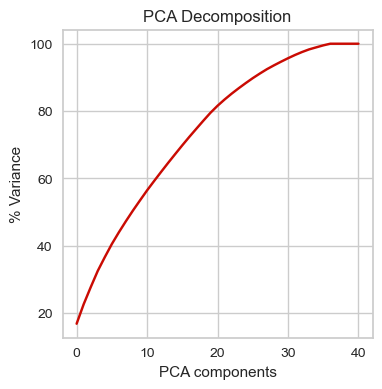

In [142]:
#Finding out the variance ratio
var=pca.explained_variance_ratio_
cum_var=np.cumsum(np.round(var,4)*100)
plt.figure(figsize=(4,4))
plt.plot(cum_var,"r-x");
plt.title("PCA Decomposition");
plt.xlabel('PCA components');
plt.ylabel('% Variance');

In [143]:
#Since the first 30 components produce 90% of the variance, we will drop the remaining ones
pca_data_standard=pd.DataFrame(pca_data_scaled)
pca_data_standard.drop(pca_data_standard.iloc[:, 30:41],axis = 1,inplace=True)
pca_data_standard

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.871478,-0.274254,-0.533434,3.068294,-0.220952,-0.969326,1.797045,-0.440357,-0.361675,-0.158284,...,-0.525157,0.838696,-1.812059,2.023508,-0.453448,0.851977,0.510017,0.086921,0.192525,0.688360
1,-2.379696,-0.919013,-0.214453,-1.396899,1.337095,-1.078840,1.602655,-0.637813,-0.652697,-0.088111,...,-1.009924,0.883852,-0.064280,0.159028,-0.023208,-0.317512,-0.163077,0.599684,0.211410,0.115416
2,1.652253,-0.297454,-1.382447,0.125202,0.306269,-1.350264,-1.036497,-0.014695,0.411174,-0.601326,...,0.495827,-1.113003,-0.386695,-0.394115,-0.150685,0.262068,0.562194,0.643342,0.873281,-0.699430
3,-2.527157,-1.881586,-0.026488,-0.771789,1.218908,-1.230019,-0.659012,0.912515,0.693365,-1.103512,...,0.653532,-0.489480,0.068977,-0.214481,0.124975,0.254310,0.147654,0.083164,-0.200685,-0.057203
4,-0.533366,-0.204163,-0.027086,-1.609621,-0.247532,1.843216,0.565129,-0.109424,0.636969,-1.806112,...,0.772315,0.541465,-0.359847,0.070280,-0.128659,0.104491,-0.196932,-0.052568,0.323547,-0.191754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2.401448,0.645868,-2.025527,0.804773,1.330860,1.405991,0.298353,0.569548,0.179304,-0.199304,...,0.186496,-1.046645,-1.035026,0.118150,1.525381,-1.019188,-1.290928,-0.557245,0.609258,1.919707
2212,-0.989647,2.757804,1.235307,-1.506389,0.544527,-0.916502,-0.293760,1.033053,1.323832,-1.852599,...,-2.788833,1.512821,-1.137801,-2.671451,0.869394,0.766159,-0.197090,1.389917,1.123928,-0.462848
2213,1.436850,-0.392319,0.652775,-1.457370,2.269745,-0.643049,-0.268824,-0.887290,-0.643953,1.420169,...,1.073418,-1.961053,0.979179,0.541343,-1.660018,1.450462,-0.761362,0.186232,-0.654552,-1.164173
2214,1.644114,0.730698,-0.938240,-2.842243,-0.575195,-1.327537,-0.124317,2.203149,-1.187934,-0.551711,...,0.279007,-0.056136,-0.025162,-0.125085,0.155275,0.188575,0.181794,-0.001463,-0.082486,-0.027441


## K-MEANS

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## K-Means (with PCA)

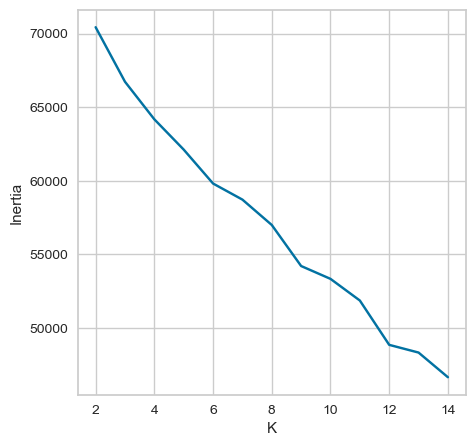

In [145]:
#Finding the optimal "K" with the Elbow Method
sum_of_squared_distances=[]
K=range(2,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(pca_data_standard)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(5,5));
plt.plot(K,sum_of_squared_distances,"bx-");
plt.xlabel("K");
plt.ylabel("Inertia");

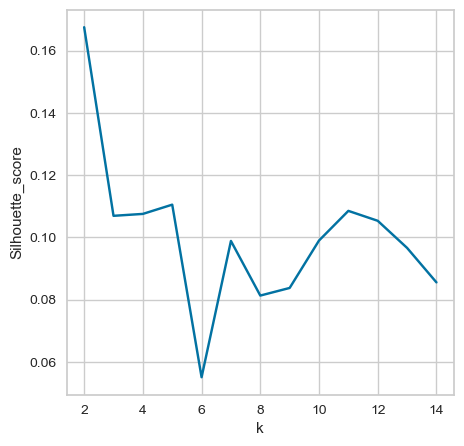

In [146]:
#Finding the optimal "K" with the Silhouette Score
silhouette_scores=[]
K=range(2,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(pca_data_standard)
  y=km.predict(pca_data_standard)
  silhouette_scores.append(silhouette_score(pca_data_standard,y))

plt.figure(figsize=(5,5));
plt.plot(K,silhouette_scores,"bx-");
plt.xlabel("k");
plt.ylabel("Silhouette_score");

In [147]:
#We chose K=2 as the best number of classes for this model
km1=KMeans(n_clusters=2)
y=km1.fit_predict(pca_data_standard)
df["K_means_pca"]=y

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2))

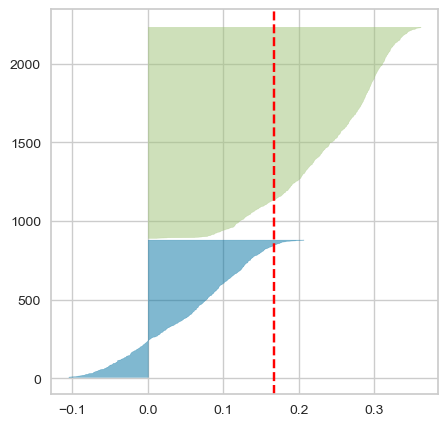

In [148]:
#Visualizing the Silhouette Score
plt.figure(figsize=(5,5));
km=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(km,colors="yellowbrick")
visualizer.fit(pca_data_standard)

## K-Means (without PCA)

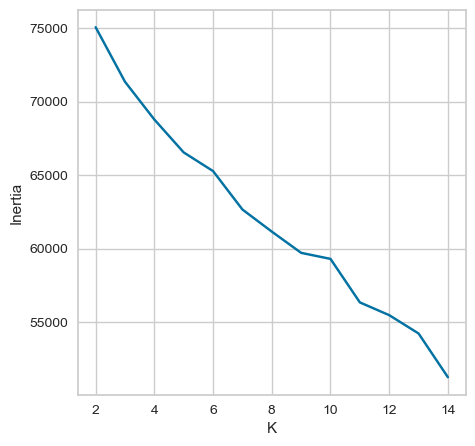

In [149]:
#Finding the optimal "K" with the Elbow Method
sum_of_squared_distances=[]
K=range(2,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df_final_scaled)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(5,5));
plt.plot(K,sum_of_squared_distances,"bx-");
plt.xlabel("K");
plt.ylabel("Inertia");

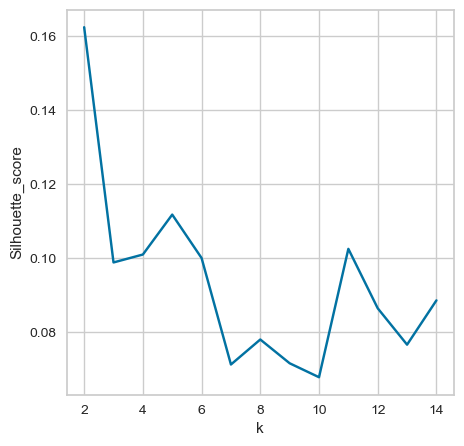

In [150]:
#Finding the optimal "K" with the Silhouette Score
silhouette_scores=[]
K=range(2,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df_final_scaled)
  y=km.predict(df_final_scaled)
  silhouette_scores.append(silhouette_score(df_final_scaled,y))

plt.figure(figsize=(5,5));
plt.plot(K,silhouette_scores,"bx-");
plt.xlabel("k");
plt.ylabel("Silhouette_score");

In [151]:
#We chose K=2 as the best number of classes for this model
km1=KMeans(n_clusters=2)
y=km1.fit_predict(pca_data_standard)
df["K_means"]=y

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2))

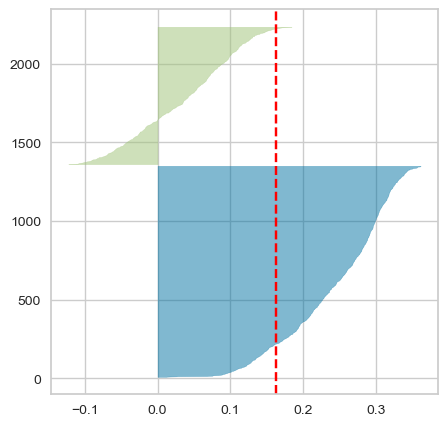

In [152]:
#Visualizing the Silhouette Score
plt.figure(figsize=(5,5));
km=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(km,colors="yellowbrick")
visualizer.fit(df_final_scaled)

## AGGLOMERATIVE HIERARCHICAL CLUSTERING

In [153]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Agglomerative Hierarchical Clustering (with PCA)

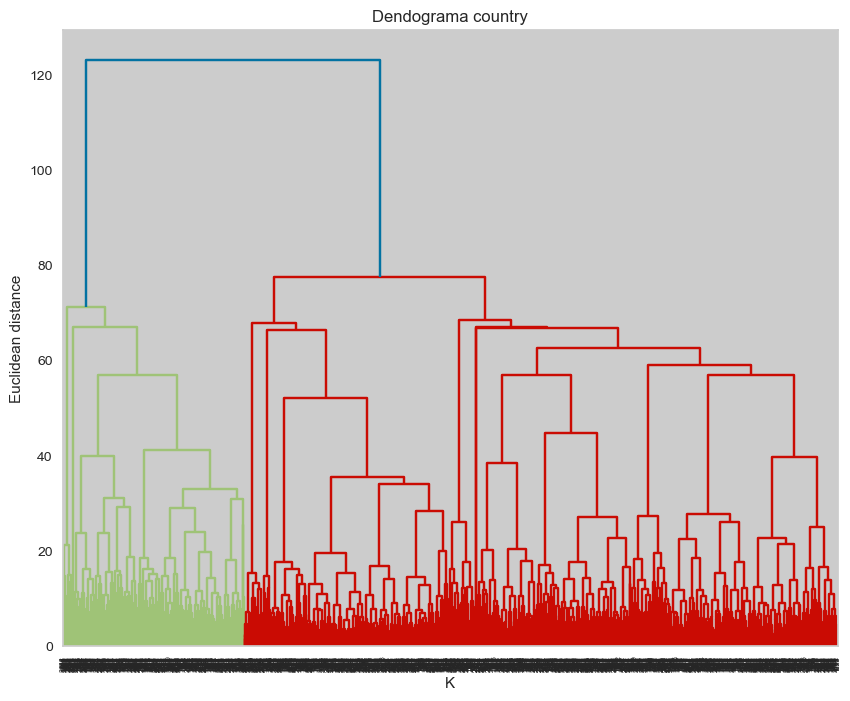

In [154]:
#Creating a dendrogram
plt.figure(figsize=(10,8))
dendrogram_plot=dendrogram(linkage(pca_data_standard,method="ward"))
plt.title("Dendograma country")
plt.xlabel("K")
plt.ylabel("Euclidean distance")
plt.show();

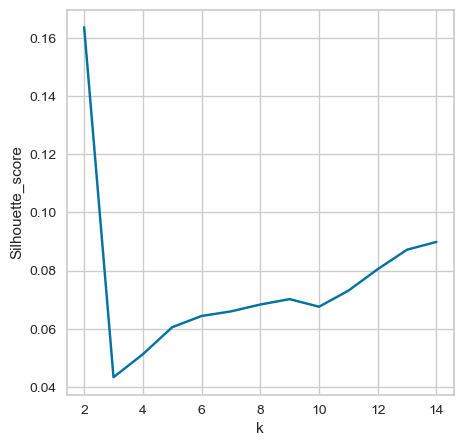

In [155]:
#Finding the optimal "K" with the Silhouette Score
silhouette_scores=[]
K=range(2,15)
for i in K:
  hc=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
  y=hc.fit_predict(pca_data_standard)
  silhouette_scores.append(silhouette_score(pca_data_standard,y))

plt.figure(figsize=(5,5));
plt.plot(K,silhouette_scores,"bx-");
plt.xlabel("k");
plt.ylabel("Silhouette_score");

In [156]:
#We chose K=2 as the best number of classes for this model
hc1=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
y=hc1.fit_predict(pca_data_standard)
df["Aglo_Clus_pca"]=y

For n_clusters = 2 The average silhouette_score is : 0.16364238049114932


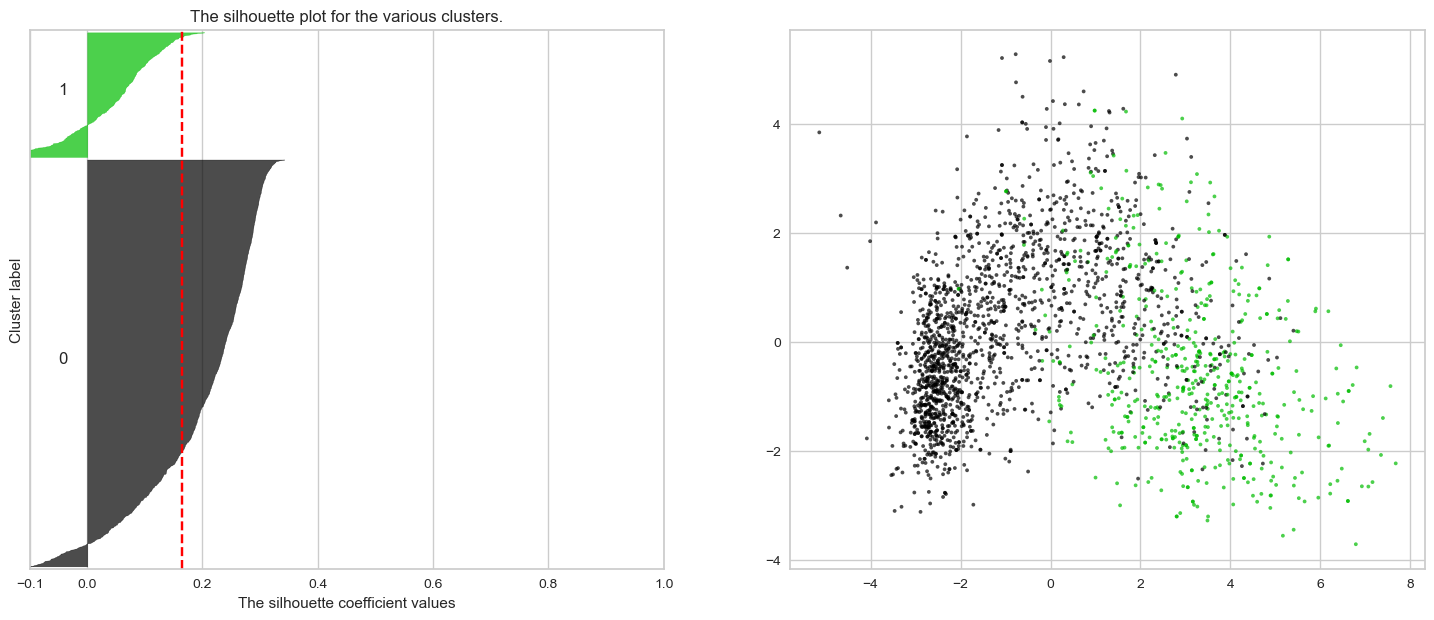

In [157]:
#Visualizing the Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2]

X=pca_data_standard

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.


    clusterer = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    


plt.show()

## Agglomerative Hierarchical Clustering (without PCA)

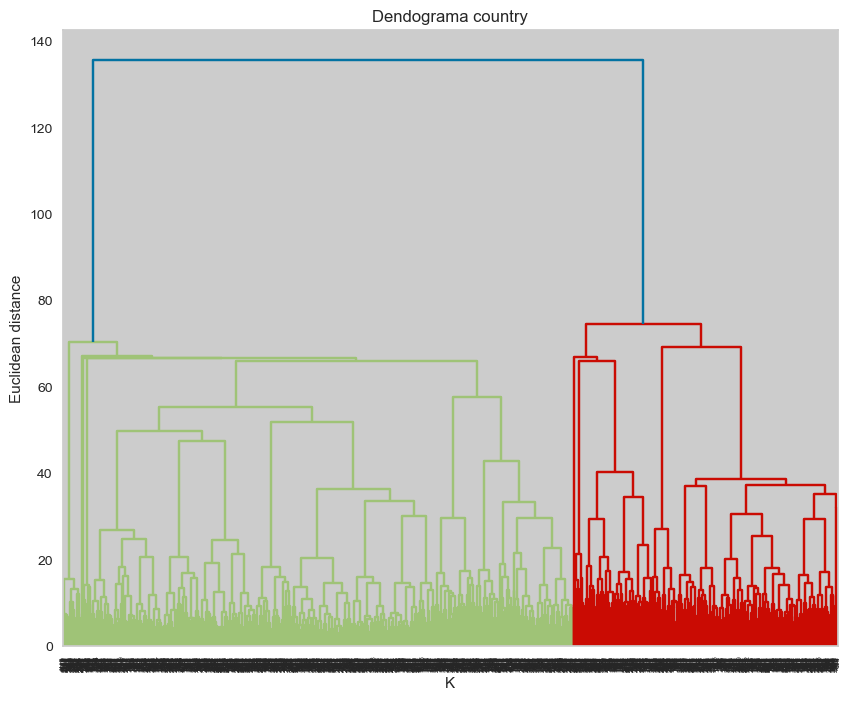

In [158]:
#Creating a dendrogram
plt.figure(figsize=(10,8))
dendrogram_plot=dendrogram(linkage(df_final_scaled,method="ward"))
plt.title("Dendograma country")
plt.xlabel("K")
plt.ylabel("Euclidean distance")
plt.show();

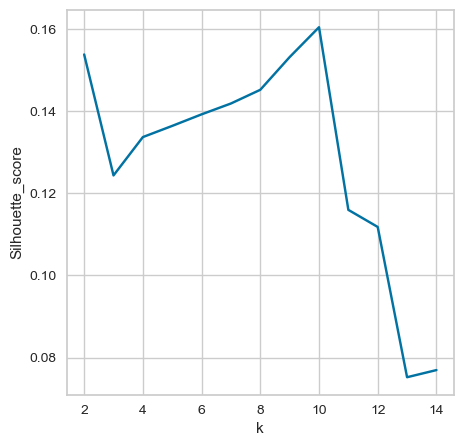

In [159]:
#Finding the optimal "K" with the Silhouette Score
silhouette_scores=[]
K=range(2,15)
for i in K:
  hc=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
  y=hc.fit_predict(df_final_scaled)
  silhouette_scores.append(silhouette_score(df_final_scaled,y))

plt.figure(figsize=(5,5));
plt.plot(K,silhouette_scores,"bx-");
plt.xlabel("k");
plt.ylabel("Silhouette_score");

In [160]:
#We chose K=2 as the best number of classes for this model
hc1=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
y=hc1.fit_predict(df_final_scaled)
df["Aglo_Clus"]=y

For n_clusters = 2 The average silhouette_score is : 0.15376665426382724


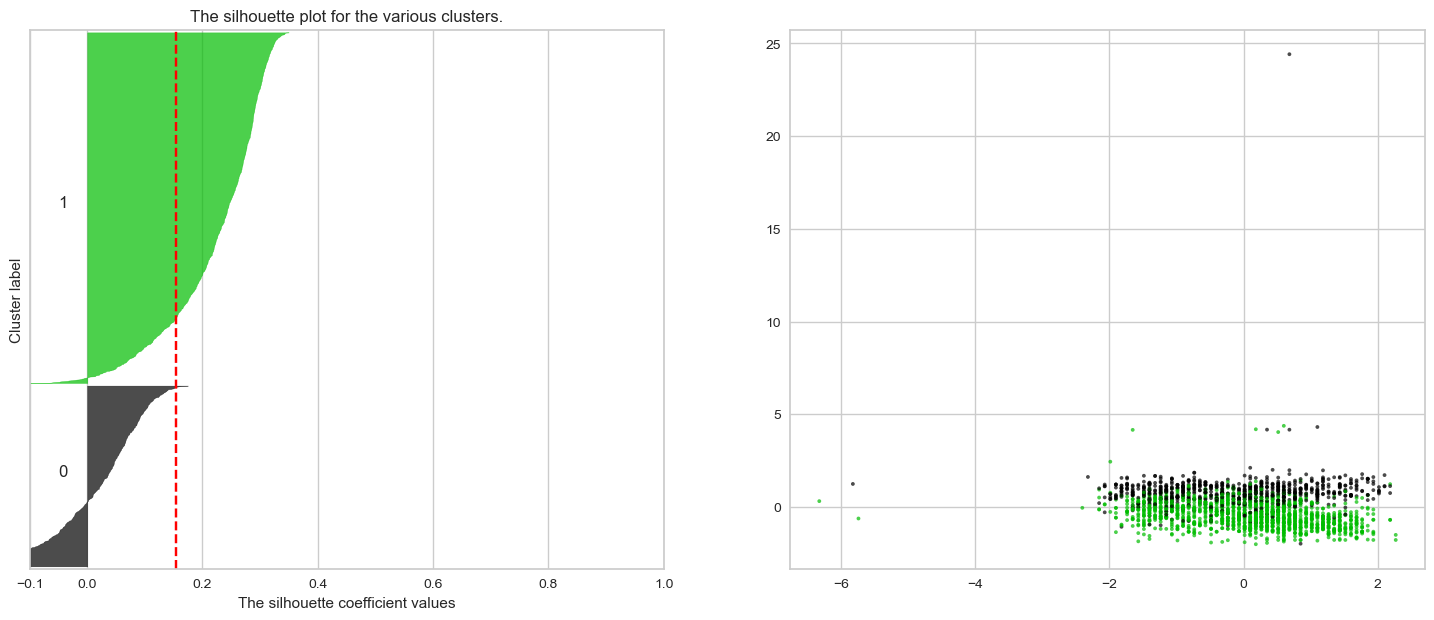

In [161]:
#Visualizing the Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2]

X=df_final_scaled

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.


    clusterer = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    


plt.show()

## DBSCAN

In [162]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

## DBSCAN (with PCA)

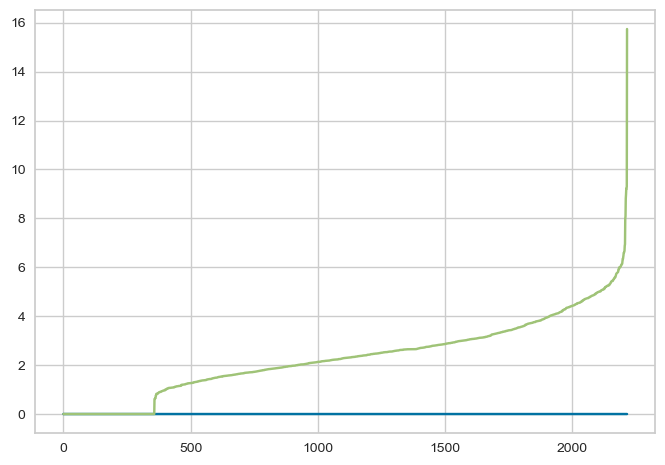

In [163]:
##Plotting the distances of the neighbors ir order to stablish a proper range of eps_values
neighbors=NearestNeighbors(n_neighbors=2)
neighbors_fit=neighbors.fit(pca_data_standard)
distances,indices=neighbors_fit.kneighbors(pca_data_standard)
distances2=np.sort(distances,axis=0)
distances3=distances2[:,1]
plt.plot(distances2);

In [164]:
##Creating different combinations of eps_values and min_samples ir order to find out the best silhouette score 
eps_values=np.arange(1.5,6,0.1)
min_samples=np.arange(3,12)

dbscan_params=list(product(eps_values,min_samples))
no_of_clusters=[]
sil_scores=[]
for p in dbscan_params:
  y_pred=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(pca_data_standard)
  try:
    sil_scores.append(silhouette_score(pca_data_standard,y_pred))
  except:
    sil_scores.append(0)
  no_of_clusters.append(len(np.unique(y_pred)))

In [165]:
df_params_tunning=pd.DataFrame.from_records(dbscan_params,columns=["Eps","Min_Samples"])
df_params_tunning["Sil_scores"]=sil_scores
df_params_tunning["n_clusters"]=no_of_clusters

In [166]:
df_params_tunning

,Eps,Min_Samples,Sil_scores,n_clusters
0,1.5,3,-0.303805,40
1,1.5,4,-0.259810,15
2,1.5,5,-0.247445,13
3,1.5,6,-0.206222,5
4,1.5,7,-0.211291,5
...,...,...,...,...
400,5.9,7,0.175992,7
401,5.9,8,0.176374,5
402,5.9,9,0.176066,5
403,5.9,10,0.175488,5


In [167]:
#Creating pivot tables with the sil_scores and n_clusters data
pivot_data1=pd.pivot_table(df_params_tunning,values="Sil_scores",index="Min_Samples",columns="Eps")
pivot_data2=pd.pivot_table(df_params_tunning,values="n_clusters",index="Min_Samples",columns="Eps")

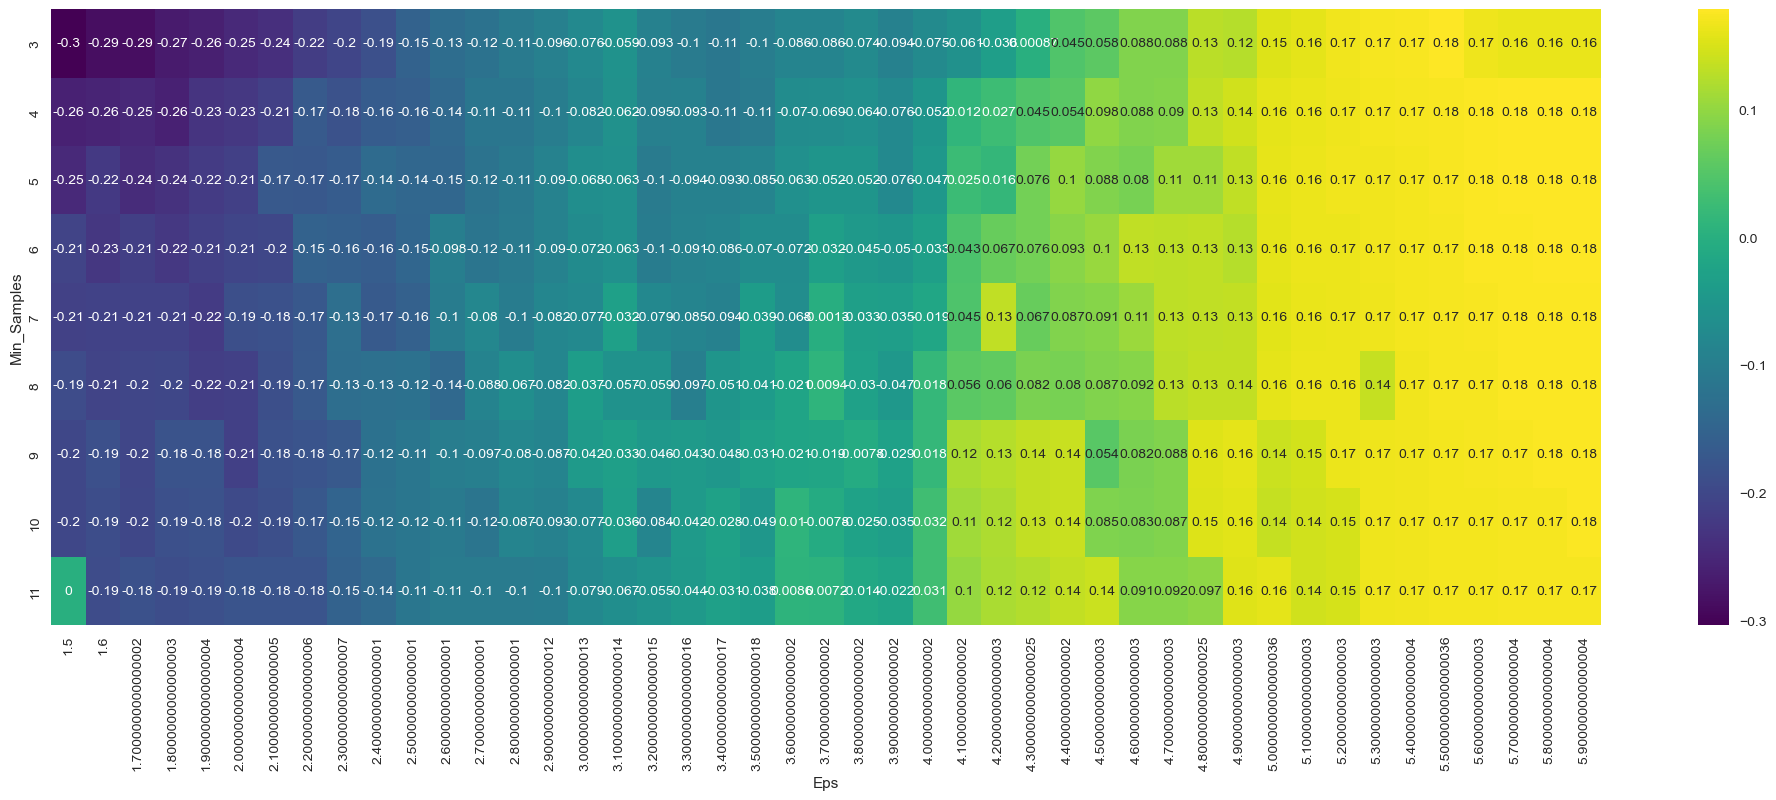

In [168]:
fig,ax=plt.subplots(figsize=(25,8))
sns.heatmap(pivot_data1,annot=True,annot_kws={"size":10},cmap="viridis",ax=ax);

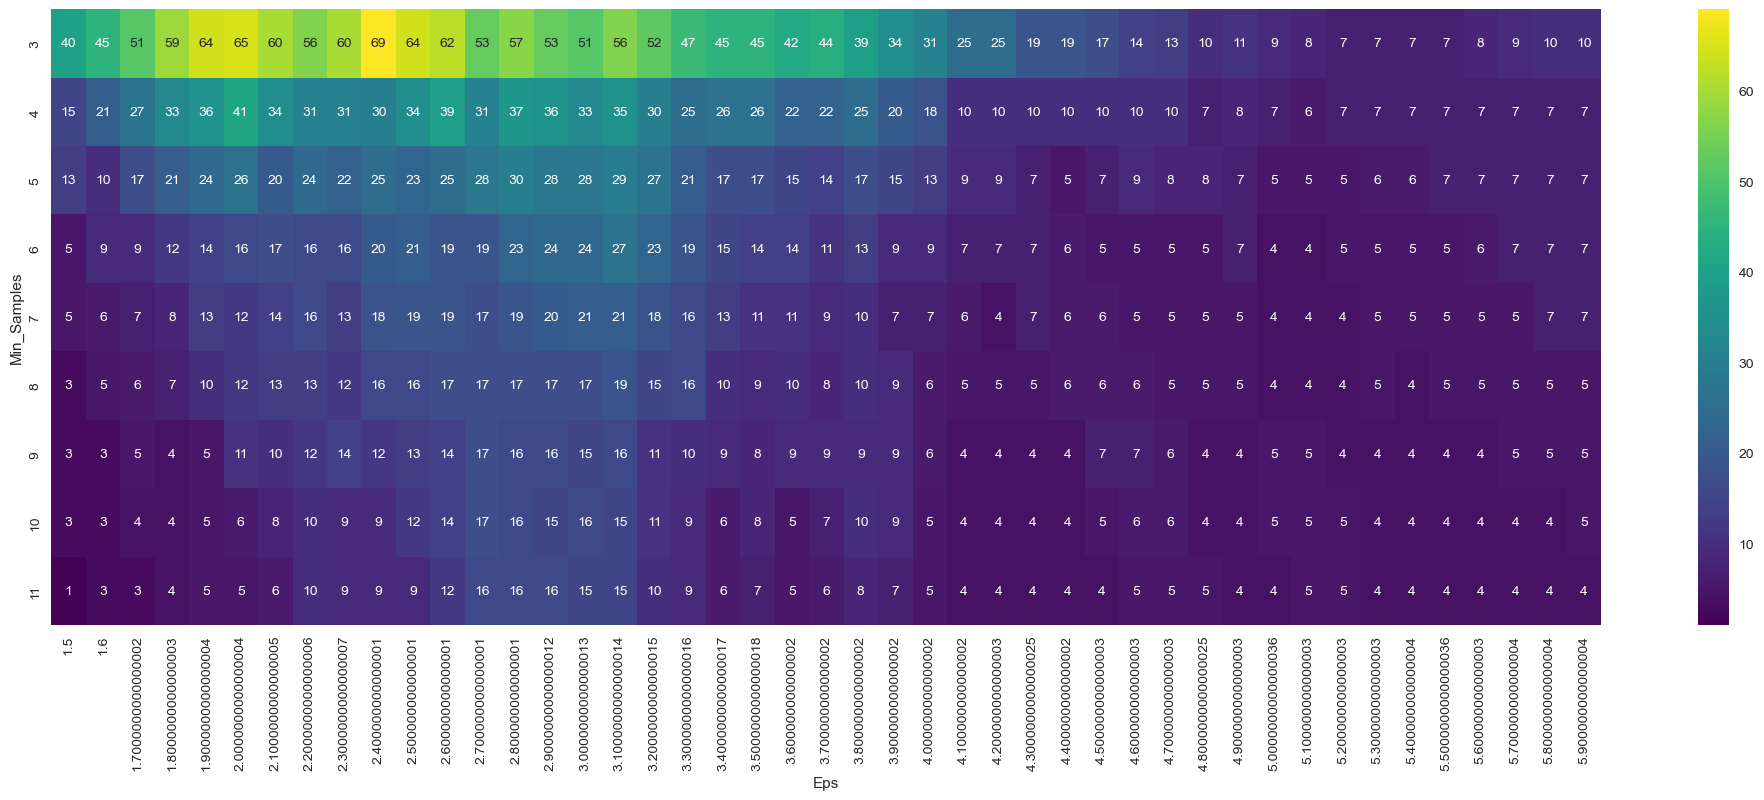

In [169]:
fig,ax=plt.subplots(figsize=(25,8))
sns.heatmap(pivot_data2,annot=True,annot_kws={"size":10},cmap="viridis",ax=ax);

In [170]:
##After analyzing the 02 graphs, it´s decided that the best eps is 5.9 and the best min_samples=11
bscan_train=DBSCAN(eps=5.9,min_samples=11)
y_dbscan=bscan_train.fit_predict(pca_data_standard)
df["DBSCAN_pca"]=y_dbscan

For n_clusters = 4 The average silhouette_score is : 0.15925667419486644


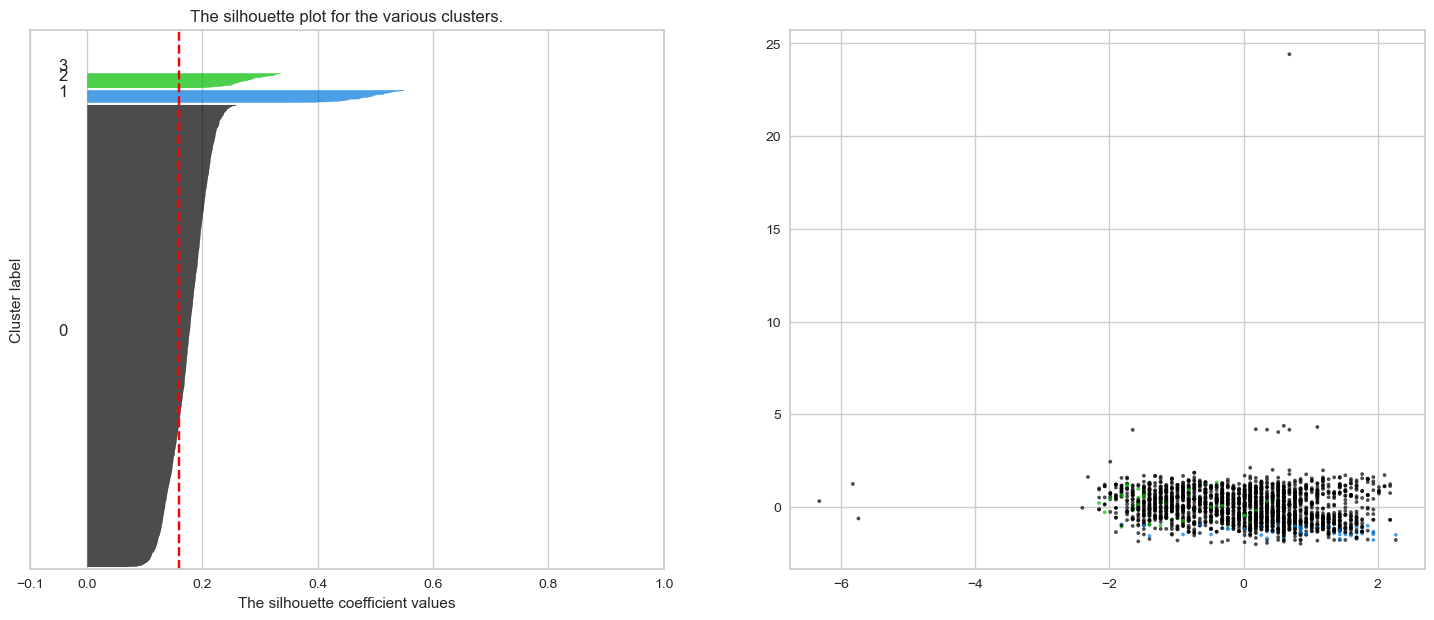

In [171]:
#Visualizing the Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X=df_final_scaled

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = DBSCAN(eps=5.9, min_samples=11)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
 "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
    )

 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
    


plt.show()

## DBSCAN (without PCA)

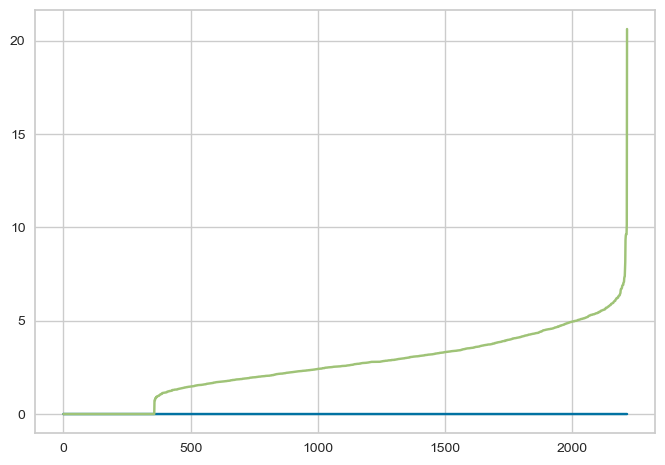

In [172]:
##Plotting the distances of the neighbors ir order to stablish a proper range of eps_values
neighbors=NearestNeighbors(n_neighbors=2)
neighbors_fit=neighbors.fit(df_final_scaled)
distances,indices=neighbors_fit.kneighbors(df_final_scaled)
distances2=np.sort(distances,axis=0)
distances3=distances2[:,1]
plt.plot(distances2);

In [173]:
##Creating different combinations of eps_values and min_samples ir order to find out the best silhouette score 
eps_values=np.arange(2,7,0.1)
min_samples=np.arange(3,12)

dbscan_params=list(product(eps_values,min_samples))
no_of_clusters=[]
sil_scores=[]
for p in dbscan_params:
  y_pred=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(df_final_scaled)
  try:
    sil_scores.append(silhouette_score(df_final_scaled,y_pred))
  except:
    sil_scores.append(0)
  no_of_clusters.append(len(np.unique(y_pred)))

In [174]:
df_params_tunning=pd.DataFrame.from_records(dbscan_params,columns=["Eps","Min_Samples"])
df_params_tunning["Sil_scores"]=sil_scores
df_params_tunning["n_clusters"]=no_of_clusters

In [175]:
df_params_tunning

,Eps,Min_Samples,Sil_scores,n_clusters
0,2.0,3,-0.256397,54
1,2.0,4,-0.238033,32
2,2.0,5,-0.241106,23
3,2.0,6,-0.224793,11
4,2.0,7,-0.220255,8
...,...,...,...,...
445,6.9,7,0.333921,5
446,6.9,8,0.336743,4
447,6.9,9,0.336642,4
448,6.9,10,0.368768,3


In [176]:
#Creating pivot tables with the sil_scores and n_clusters data
pivot_data1=pd.pivot_table(df_params_tunning,values="Sil_scores",index="Min_Samples",columns="Eps")
pivot_data2=pd.pivot_table(df_params_tunning,values="n_clusters",index="Min_Samples",columns="Eps")

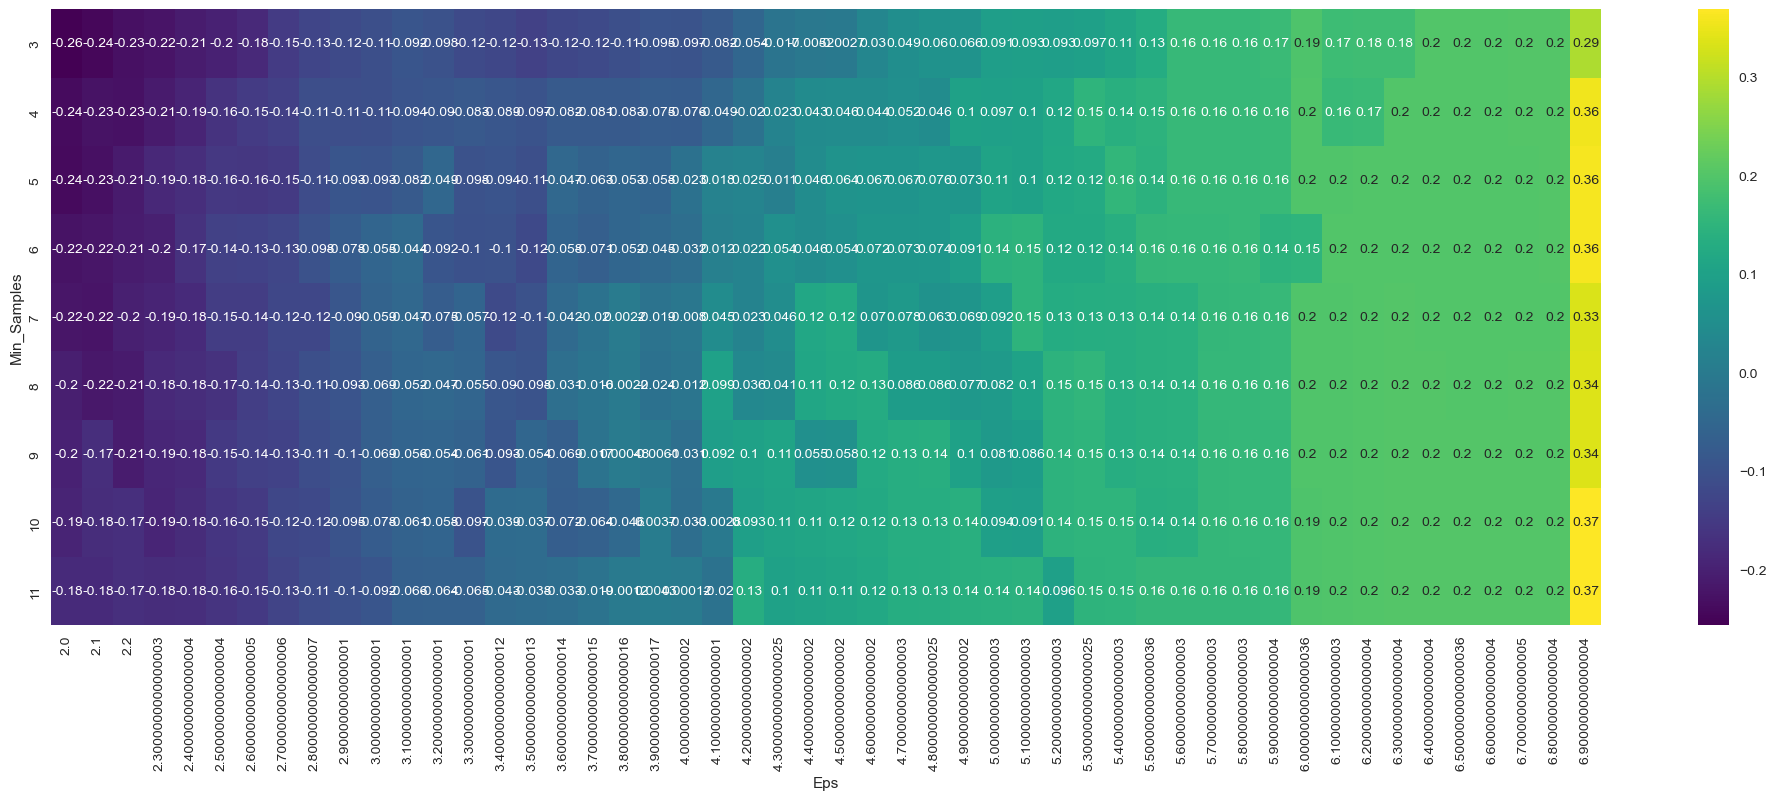

In [177]:
fig,ax=plt.subplots(figsize=(25,8))
sns.heatmap(pivot_data1,annot=True,annot_kws={"size":10},cmap="viridis",ax=ax);

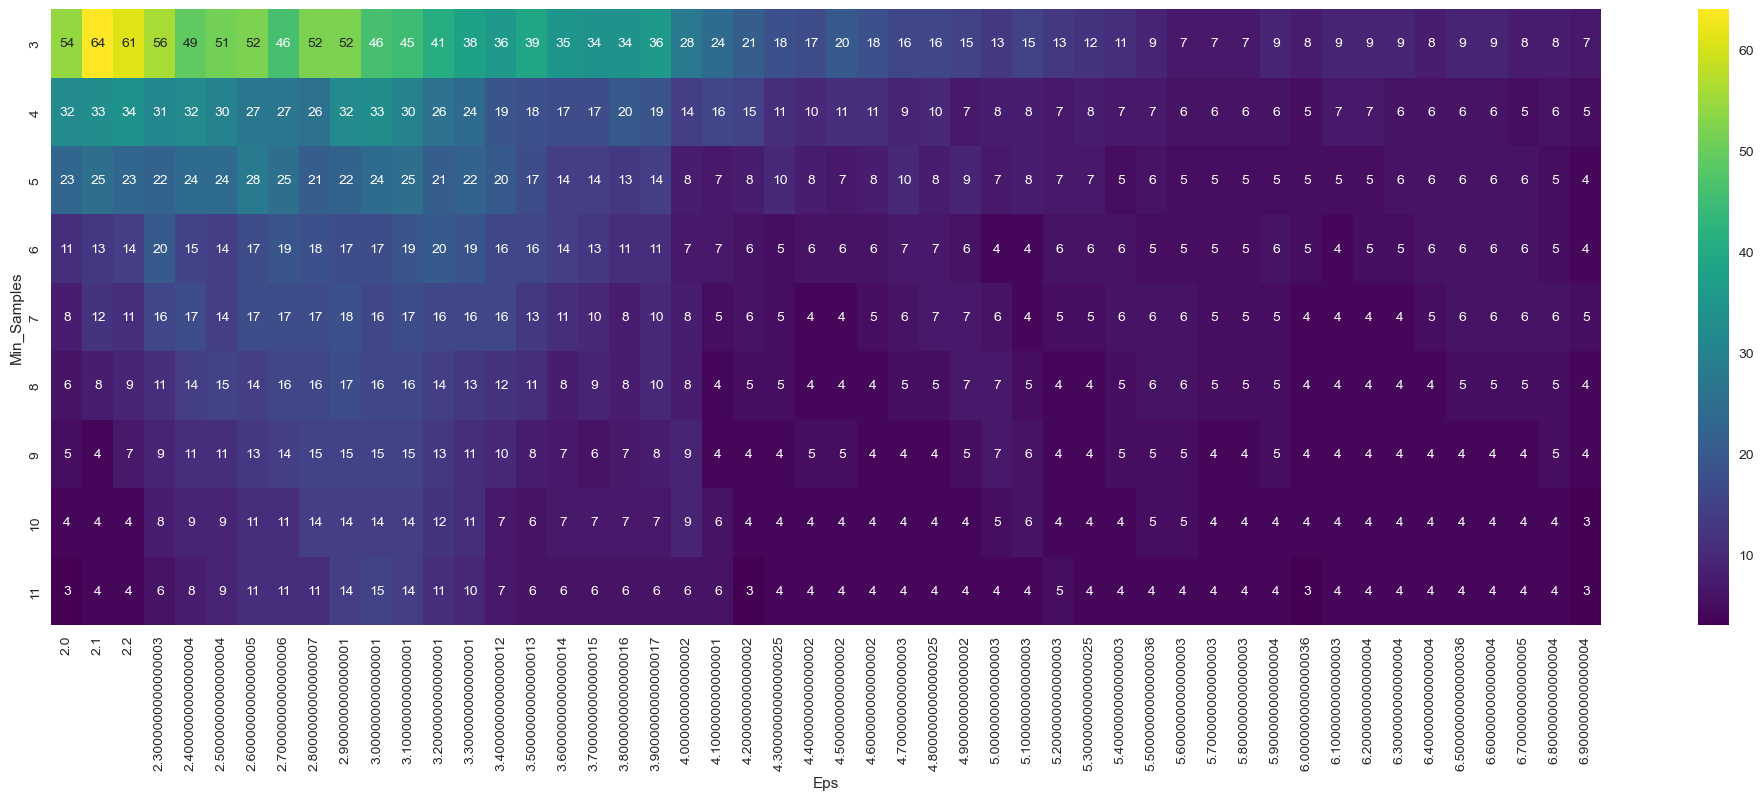

In [178]:
fig,ax=plt.subplots(figsize=(25,8))
sns.heatmap(pivot_data2,annot=True,annot_kws={"size":10},cmap="viridis",ax=ax);

In [179]:
##After analyzing the 02 graphs, it´s decided that the best eps is 6.9 and the best min_samples=10
bscan_train=DBSCAN(eps=6.9,min_samples=10)
y_dbscan=bscan_train.fit_predict(df_final_scaled)
df["DBSCAN"]=y_dbscan

For n_clusters = 3 The average silhouette_score is : 0.36876796966869324


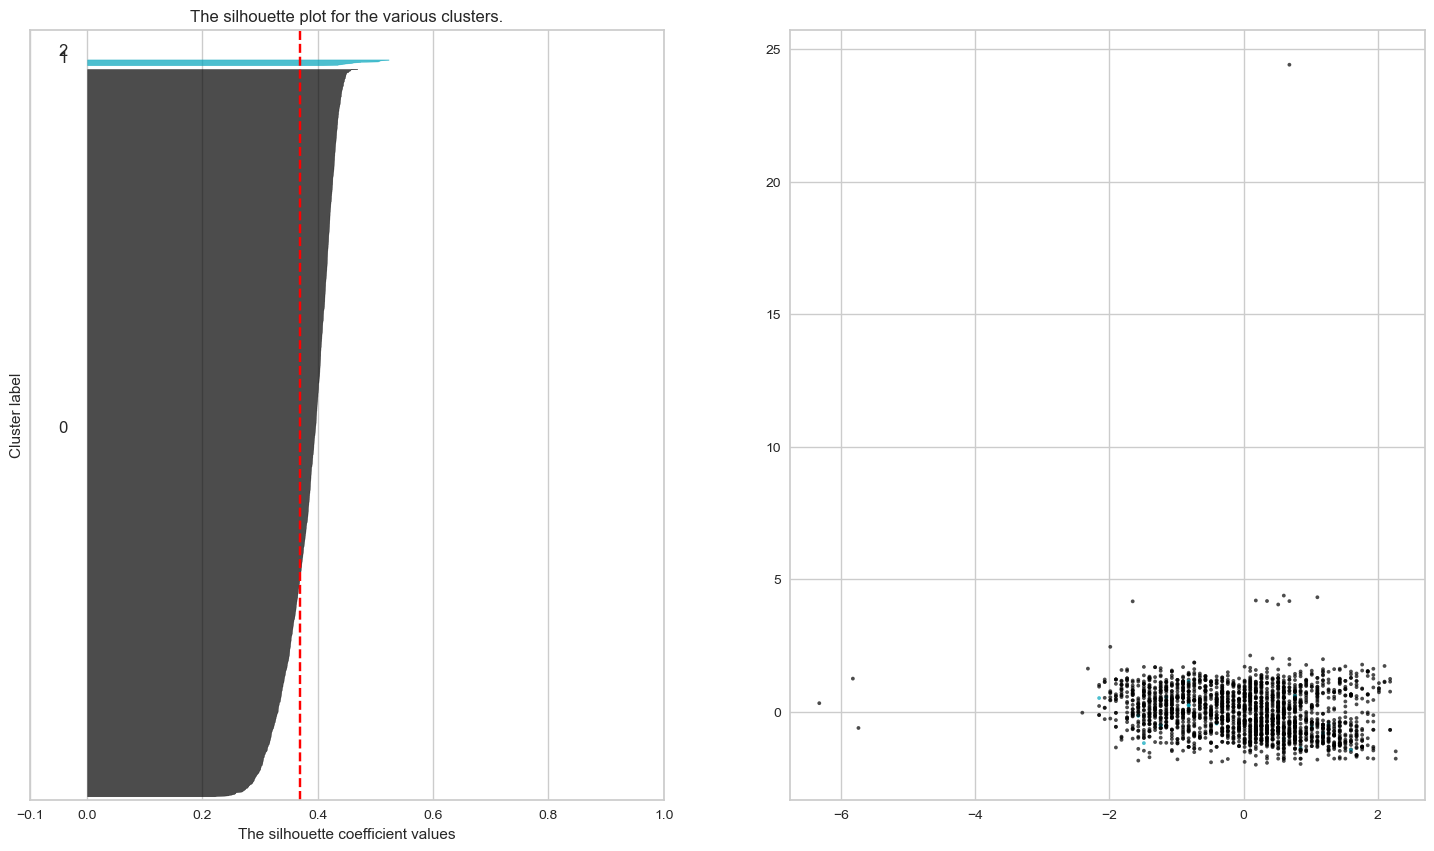

In [180]:
#Visualizing the Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X=df_final_scaled

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 10)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = DBSCAN(eps=6.9, min_samples=10)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
 "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
    )

 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
    


plt.show()

In [181]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,YOLO,K_means_pca,K_means,Aglo_Clus_pca,Aglo_Clus,DBSCAN_pca,DBSCAN
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,1,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,1,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,0,1,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,1,0,0,1,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,1,1,0,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,1,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,1,0,0,1,0,0,0,0,0


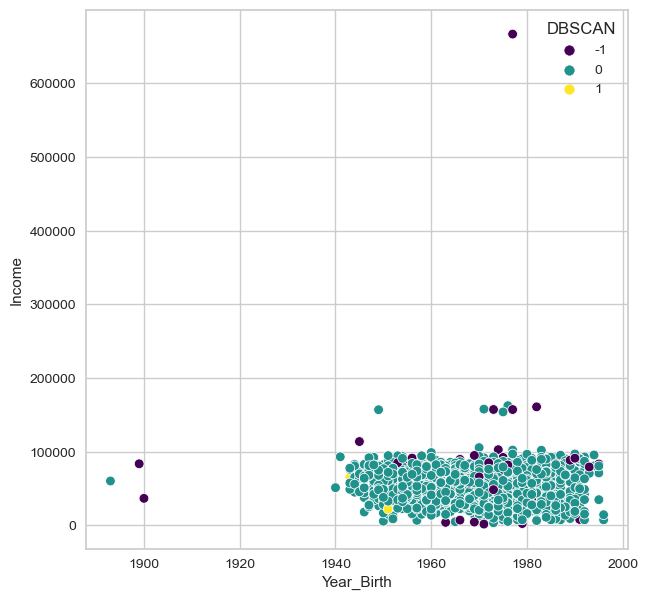

In [182]:
##Ploting the best model
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Year_Birth",y="Income",hue="DBSCAN",palette="viridis");